In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('movies_dataset.csv',usecols=['popularity','genres','release_year']);
data.head()

,popularity,genres,release_year
0,1.234890,Comedy,1995
1,0.815631,Action|Thriller|Crime,1993
2,12.037933,Adventure|Action|Science Fiction,1977
3,3.440519,Animation|Family,2003
4,6.715966,Comedy|Drama|Romance,1994


In [4]:
data.isnull().sum()

popularity       0
genres          23
release_year     0
dtype: int64

In [5]:
data.dropna(how='any',inplace=True)
data.isnull().sum()

popularity      0
genres          0
release_year    0
dtype: int64

In [6]:
df=pd.DataFrame(data)

In [7]:
def filter_list(g):
    g.groupby('genres').popularity.median()
    return g.sort_values('popularity',ascending=False).head(3)
df=df.groupby('release_year').apply(filter_list)

In [8]:
%matplotlib inline
df

popularity  \
release_year                     
1960         261      2.610362   
             509      1.872132   
             510      1.136943   
1961         3541     2.631987   
             81       1.752027   
             714      0.900245   
1962         331      3.170651   
             499      1.168767   
             412      0.823779   
1963         337      2.508235   
             1821     2.180410   
             278      1.139321   
1964         338      3.153791   
             493      2.210475   
             212      1.987819   
1965         339      1.910465   
             4468     1.313676   
             476      1.282053   
1966         3861     1.227582   
             708      0.929393   
             1056     0.737730   
1967         1892     2.550704   
             6845     2.227230   
             3529     1.975304   
1968         22       3.309196   
             462      1.152937   
             2551     1.058272   
1969         343      1.778746   
             329      1.357317   
             317      0.897684   
...                        ...   
2006         433      5.838503   
             20       4.205992   
             482      3.941265   
2007         147      4.965391   
             348      4.878162   
             856      2.764535   
2008         76       8.466668   
             2775     5.678119   
             715      4.977955   
2009         5346     9.432768   
             4830     6.098027   
             3577     5.806897   
2010         6166     9.363643   
             2434     5.704860   
             3507     5.572950   
2011         9182     8.411577   
             723      7.959228   
             7916     5.903353   
2012         5836     7.637767   
             7610     7.031452   
             7462     6.591277   
2013         8684     6.112766   
             7465     5.242753   
             8176     5.111900   
2014         9108    24.949134   
             8767    14.311205   
             8596    12.971027   
2015         8935    32.985763   
             8177    28.419936   
             10054   13.112507   

                                                               genres  \
release_year                                                            
1960         261                                Drama|Horror|Thriller   
             509                             Action|Adventure|Western   
             510                                 Action|Drama|History   
1961         3541                   Adventure|Animation|Comedy|Family   
             81                                  Comedy|Drama|Romance   
             714                                    Music|Crime|Drama   
1962         331                            Adventure|Action|Thriller   
             499                          Adventure|Drama|History|War   
             412                                        Drama|Romance   
1963         337                            Action|Thriller|Adventure   
             1821                                    Animation|Family   
             278                                               Horror   
1964         338                            Adventure|Action|Thriller   
             493                                     Drama|Comedy|War   
             212                          Comedy|Music|Family|Fantasy   
1965         339                            Adventure|Action|Thriller   
             4468                          Drama|Family|Music|Romance   
             476                                    Drama|Romance|War   
1966         3861                             Animation|Family|Comedy   
             708                                Drama|Science Fiction   
             1056                                Comedy|Crime|Romance   
1967         1892                          Family|Animation|Adventure   
             6845                                Comedy|Drama|Romance   
             3529                             Advent

In [9]:
df=df.reindex(columns=['release_year','popularity','genres'])

In [10]:
df.iloc[0:6,0:3]

release_year  popularity                             genres
release_year                                                                  
1960         261           1960    2.610362              Drama|Horror|Thriller
             509           1960    1.872132           Action|Adventure|Western
             510           1960    1.136943               Action|Drama|History
1961         3541          1961    2.631987  Adventure|Animation|Comedy|Family
             81            1961    1.752027               Comedy|Drama|Romance
             714           1961    0.900245                  Music|Crime|Drama

In [11]:
df.add_suffix('_top').reset_index().to_csv('top.csv')

In [12]:
top=pd.read_csv('top.csv',usecols=['release_year_top','popularity_top','genres_top'])
top.head()

,release_year_top,popularity_top,genres_top
0,1960,2.610362,Drama|Horror|Thriller
1,1960,1.872132,Action|Adventure|Western
2,1960,1.136943,Action|Drama|History
3,1961,2.631987,Adventure|Animation|Comedy|Family
4,1961,1.752027,Comedy|Drama|Romance


In [13]:
topData=pd.DataFrame(top)
topData.head()

,release_year_top,popularity_top,genres_top
0,1960,2.610362,Drama|Horror|Thriller
1,1960,1.872132,Action|Adventure|Western
2,1960,1.136943,Action|Drama|History
3,1961,2.631987,Adventure|Animation|Comedy|Family
4,1961,1.752027,Comedy|Drama|Romance


In [14]:
topData['release_year_top'].astype(int)

0      1960
1      1960
2      1960
3      1961
4      1961
5      1961
6      1962
7      1962
8      1962
9      1963
10     1963
11     1963
12     1964
13     1964
14     1964
15     1965
16     1965
17     1965
18     1966
19     1966
20     1966
21     1967
22     1967
23     1967
24     1968
25     1968
26     1968
27     1969
28     1969
29     1969
       ... 
138    2006
139    2006
140    2006
141    2007
142    2007
143    2007
144    2008
145    2008
146    2008
147    2009
148    2009
149    2009
150    2010
151    2010
152    2010
153    2011
154    2011
155    2011
156    2012
157    2012
158    2012
159    2013
160    2013
161    2013
162    2014
163    2014
164    2014
165    2015
166    2015
167    2015
Name: release_year_top, Length: 168, dtype: int32

In [17]:
topData.head(10)

,release_year_top,popularity_top,genres_top
0,1960,2.610362,Drama|Horror|Thriller
1,1960,1.872132,Action|Adventure|Western
2,1960,1.136943,Action|Drama|History
3,1961,2.631987,Adventure|Animation|Comedy|Family
4,1961,1.752027,Comedy|Drama|Romance
5,1961,0.900245,Music|Crime|Drama
6,1962,3.170651,Adventure|Action|Thriller
7,1962,1.168767,Adventure|Drama|History|War
8,1962,0.823779,Drama|Romance
9,1963,2.508235,Action|Thriller|Adventure


In [18]:
import numpy as np
Years = np.array(topData['release_year_top'].values, dtype='float64')
Popularity = np.array(topData['popularity_top'].values*10, dtype='float64')
Genres = np.array(topData['genres_top'].values)

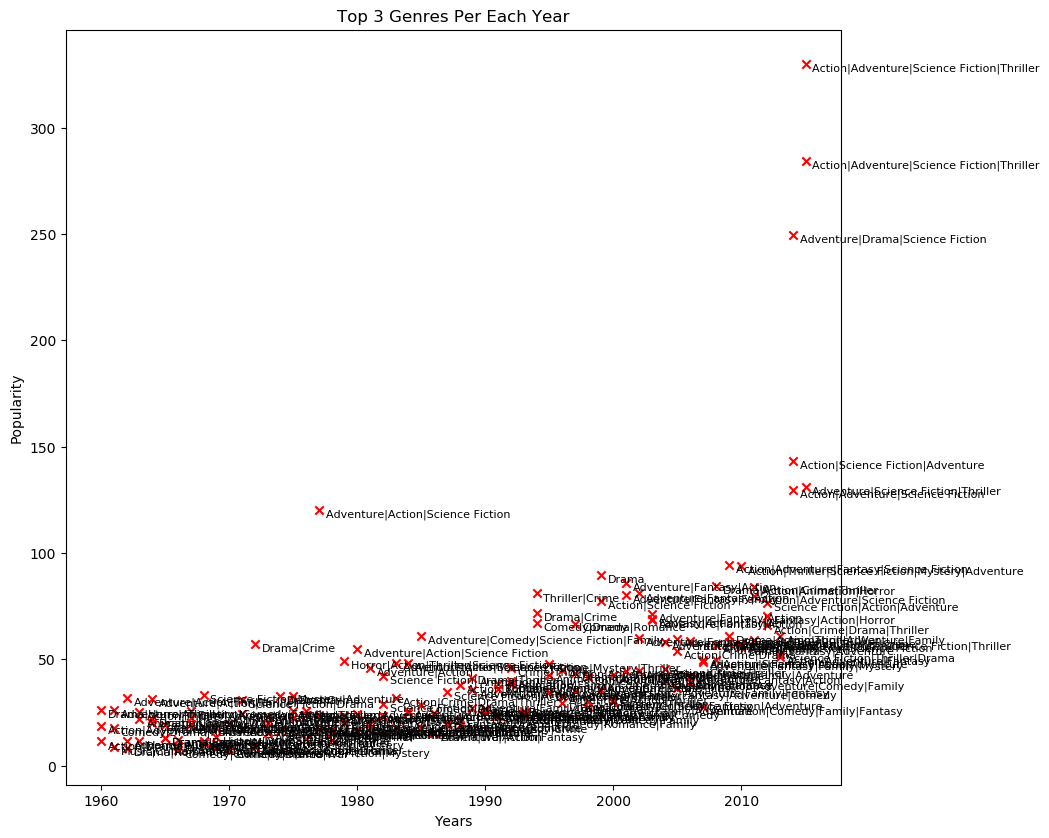

In [21]:
plt.figure(num=None, figsize=(10, 10), dpi=100)
plt.scatter(Years,Popularity, color='r', marker="x")

for G, Y, P in zip(Genres, Years, Popularity):    
    plt.annotate(G,xy=(Y, P), xytext=(5, -5), textcoords='offset points',fontsize=8)
    
plt.title("Top 3 Genres Per Each Year")
plt.xlabel("Years")
plt.ylabel("Popularity")
plt.show()